In [ ]:


import  pandas as pd 
df = pd.read_csv(r'D:\01-Alexander\OneDrive\Study\Skillfactory\Projects\01-Skillfactory\00-Data\tips.xls')
df.head()



10.2.1 Сколько строк содержится в датафрейме без учёта заголовка? Пример формата ответа: 150

In [ ]:
df_info=pd.read_csv(r'D:\01-Alexander\OneDrive\Study\Skillfactory\Projects\01-Skillfactory\00-Data\tips.xls', header=None)
df.info()

In [ ]:
df.total_bill.max()

In [ ]:
df.plot()

При обращении к методу plot без указания параметров компьютер построил графики для всех имеющихся в датафрейме количественных признаков. При этом на графике по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения показателей.
Настройка параметров метода

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

In [ ]:
df.total_bill.plot(kind = 'hist')

In [ ]:


df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')



При работе с категориальными (нечисловыми) переменными с помощью метода plot, датафрейм необходимо предварительно обработать. Если мы хотим увидеть распределение посетителей по дням недели, нужно посчитать, сколько заказов пришлось на каждый из дней. Сделать это можно с помощью метода value_counts(), а уже к получившейся series применить метод plot. Тип графика, который мы будем использовать, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

In [ ]:
df['day'].value_counts().plot(kind='bar', grid=True, colormap='coolwarm', title='Количество поситителей по дням')

Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

In [ ]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

In [ ]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

In [ ]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

In [ ]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

In [ ]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh') 

10.5. Объектно-ориентированный подход

Объектно-ориентированный подход

Matplotlib — это библиотека Python, обладающая широкими возможностями для создания и отображения графической информации. В этом блоке мы рассмотрим основные приёмы работы с этой библиотекой на примере оформления графиков для датасета tips.csv. 

Импортируйте необходимые библиотеки, включая модуль pyplot библиотеки Matplotlib, который содержит требуемые функции и методы. Для корректного отображения графиков в ноутбуке используйте команду %matplotlib inline. Загрузите файл tips.csv.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r'D:\01-Alexander\OneDrive\Study\Skillfactory\Projects\01-Skillfactory\00-Data\tips.xls')



Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

plt.axes

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

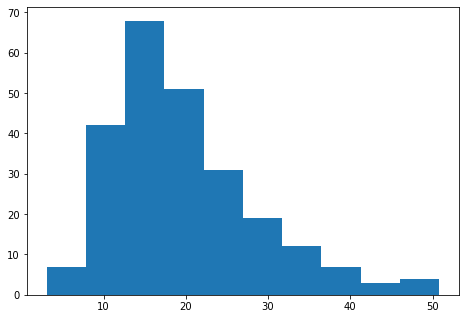

In [30]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

    axes.set_title — заголовок диаграммы;
    axes.set_ylabel — заголовок для оси ординат;
    axes.set_xlabel — заголовок для оси абсцисс.


Text(0.5, 0, 'Сумма заказа, USD')

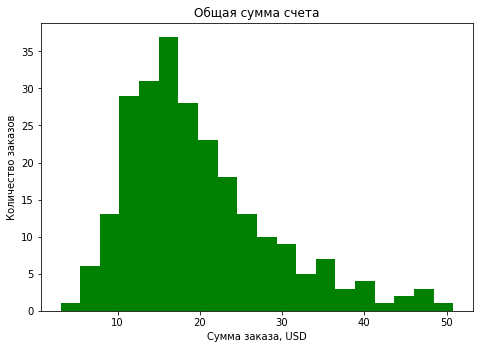

In [31]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

Text(0, 0.5, 'Размер чаевых')

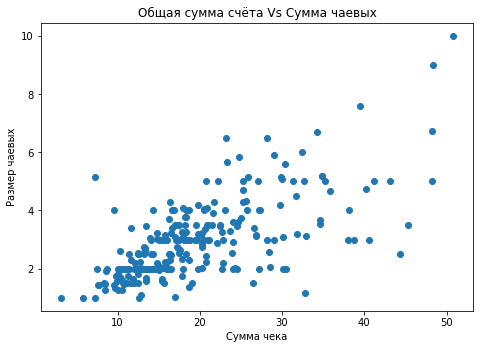

In [32]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. Посмотрите другие варианты форм маркеров.

Text(0, 0.5, 'Размер чаевых')

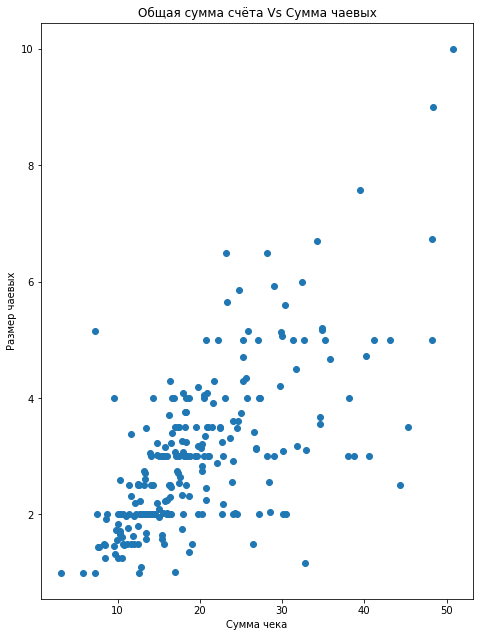

In [38]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,1,2])  
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Text(0, 0.5, 'Размер чаевых')

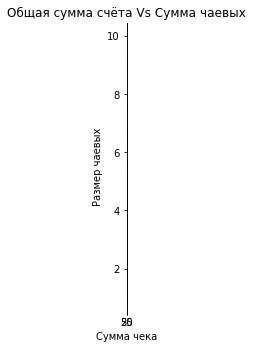

In [42]:
fig = plt.figure()
axes = fig.add_axes([1,0,0,1]) 
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

10.6. Несколько систем координат


Несколько систем координат

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ слева и снизу, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

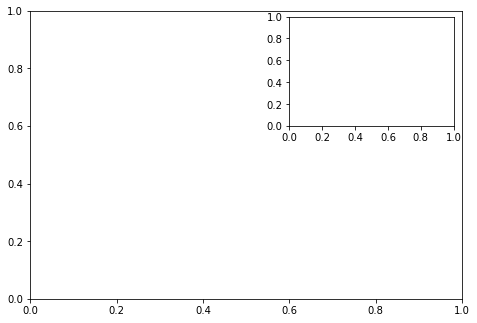

In [45]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
insert_axes = fig.add_axes([0.6,0.6, 0.38, 0.38])

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

Создание вспомогательного графика

Работу по размещению двух графиков в одном объекте начнём с создания вспомогательного датафрейма, содержащего информацию о минимальной и максимальной сумме счёта по дням недели:

In [48]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

    к объекту main_axes применим метод hist;
    для объекта insert_axes используем метод bar.


<BarContainer object of 4 artists>

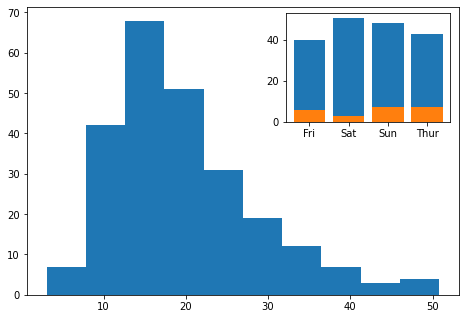

In [49]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar
Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону:

<BarContainer object of 4 artists>

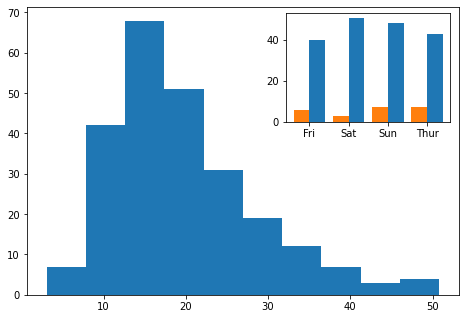

In [50]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

10.7. Добавление легенды

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

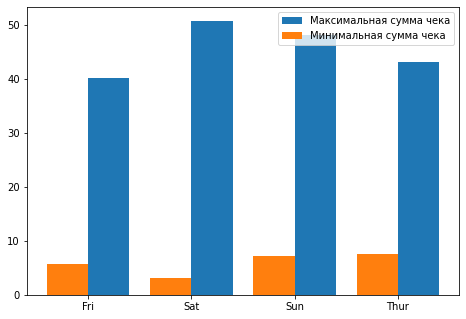

In [52]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

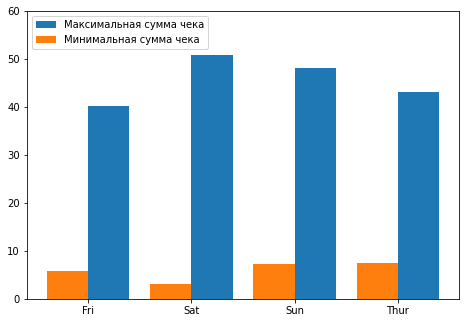

In [61]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 2)